In [4]:
import lyricsgenius
import pandas as pd
import requests

In [5]:
access_token = "rYkmyYFCtvkvlS5wsy5P5oWJLNGWWvvUM9-OMVekLmVZhsgz5rJLaZzVldUomRIF"

In [6]:
from requests.adapters import HTTPAdapter

In [7]:
s = requests.Session()
s.mount("http://api.genius.com", HTTPAdapter(max_retries=5))

In [8]:
LyricGenius = lyricsgenius.Genius(access_token)

In [9]:
artists_list = ["Pantera", "Slayer", "Lamb of God",
                "Gojira", "Randy Rogers Band",
                "George Strait", "Kelly Clarkson",
                "Eli Young Band", "Micheal Buble",
                "Reba McEntire", "NWA", "Clint Black",
                "Dwight Yoakam", "Beyonce", "Celia Cruz",
                "Van Halen", "Trampled by turtles",
                "WuTang Clan", "Michael Jackson",
                "Tyler Childers", "Tim Mcgraw",
                "The band perry", "Jonas brothers",
                "Selena", "Kendrick Lamar", "Frank Ocean",
                "Mac Miller", "Kanye West",
                "Tyler the Creator"]

In [10]:
all_lyrics = []
for artist in artists_list:
    try:
        lyric_list = []
        artist_search = LyricGenius.search_artist(artist, max_songs=5)
        for song in artist_search.songs:
            lyric_list.append(song.lyrics)
        all_lyrics.append(lyric_list)
    except:
        print("Something went wrong here...")
        continue

Searching for songs by Pantera...

Song 1: "Walk"
Song 2: "Cemetery Gates"
Song 3: "This Love"
Song 4: "Cowboys from Hell"
Song 5: "Domination"

Reached user-specified song limit (5).
Done. Found 5 songs.
Searching for songs by Slayer...

Song 1: "Angel of Death"
Song 2: "Raining Blood"
Song 3: "Dead Skin Mask"
Song 4: "South of Heaven"
Song 5: "Seasons in the Abyss"

Reached user-specified song limit (5).
Done. Found 5 songs.
Searching for songs by Lamb of God...

Song 1: "Laid to Rest"
Song 2: "Omerta"
Song 3: "Memento Mori"
Song 4: "Redneck"
Song 5: "Walk with Me in Hell"

Reached user-specified song limit (5).
Done. Found 5 songs.
Searching for songs by Gojira...

Song 1: "Flying Whales"
Song 2: "Stranded"
Song 3: "L’enfant sauvage"
Song 4: "Silvera"
Song 5: "The Art of Dying"

Reached user-specified song limit (5).
Done. Found 5 songs.
Searching for songs by Randy Rogers Band...

Song 1: "In My Arms Instead"
Song 2: "Crazy People"
Song 3: "Buy Myself A Chance"
Song 4: "Steal You A

In [11]:
all_lyrics_df = pd.DataFrame(all_lyrics)
all_lyrics_df.to_csv('all_lyrics.csv')
#print(all_lyrics)

**Found "Rate Your Music" list of top 500 on Data.World**

In [185]:
rym_top_500 = pd.read_csv('rym_top_500_albums.tsv',sep='\t')
rym_top_500.head()

,position,album_id,artist,name,date,genres,rating,num_ratings,num_reviews
0,1,Album45,Radiohead,Ok Computer,1997,"Alternative Rock, Art Rock",4.23,60527,1583
1,2,Album46,Radiohead,Kid A,2000,"Art Rock, Experimental Rock, Electronic",4.23,50279,714
2,3,Album976,Pink Floyd,The Dark Side Of The Moon,1973,"Art Rock, Progressive Rock",4.23,50633,1524
3,4,Album974,Pink Floyd,Wish You Were Here,1975,"Progressive Rock, Art Rock",4.29,41760,939
4,5,Album2328,King Crimson,In The Court Of The Crimson King,1969,"Progressive Rock, Art Rock",4.31,37873,828


In [186]:
rym_top = rym_top_500.drop_duplicates(subset=['artist'],keep='last')
rym_top.head()

,position,album_id,artist,name,date,genres,rating,num_ratings,num_reviews
10,11,Album1245,Neutral Milk Hotel,In The Aeroplane Over The Sea,1998,"Indie Folk, Indie Rock",4.11,41032,942
17,18,Album142671,Madvillain,Madvillainy,2004,Abstract Hip Hop,4.20,26806,317
27,28,Album11082,Nas,Illmatic,1994,"East Coast Hip Hop, Boom Bap, Hardcore Hip Hop",4.19,25578,584
30,31,Album2671,Slint,Spiderland,1991,"Post-Rock, Math Rock, Post-Hardcore",4.15,27345,470
32,33,Album11014,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),1993,"East Coast Hip Hop, Boom Bap, Hardcore Hip Hop",4.20,23647,412


In [187]:
rym_top.genres = rym_top.genres.str.split(',')
rym_top.genres

C:\Users\chris\AppData\Local\Temp\ipykernel_25796\2468017883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rym_top.genres = rym_top.genres.str.split(',')


10                             [Indie Folk,  Indie Rock]
17                                    [Abstract Hip Hop]
27     [East Coast Hip Hop,  Boom Bap,  Hardcore Hip ...
30               [Post-Rock,  Math Rock,  Post-Hardcore]
32     [East Coast Hip Hop,  Boom Bap,  Hardcore Hip ...
                             ...                        
495          [G-Funk,  West Coast Hip Hop,  Gangsta Rap]
496                                   [Progressive Rock]
497                                       [Thrash Metal]
498                [Canterbury Scene,  Progressive Rock]
499                     [Memphis Rap,  Southern Hip Hop]
Name: genres, Length: 296, dtype: object

**Pull only the first genre classified**

In [188]:
rym_top.loc[:, 'genre'] = rym_top.genres.map(lambda x: x[0])

C:\Users\chris\AppData\Local\Temp\ipykernel_25796\2211683808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rym_top.loc[:, 'genre'] = rym_top.genres.map(lambda x: x[0])


In [189]:
rym_top

,position,album_id,artist,name,date,genres,rating,num_ratings,num_reviews,genre
10,11,Album1245,Neutral Milk Hotel,In The Aeroplane Over The Sea,1998,"[Indie Folk, Indie Rock]",4.11,41032,942,Indie Folk
17,18,Album142671,Madvillain,Madvillainy,2004,[Abstract Hip Hop],4.20,26806,317,Abstract Hip Hop
27,28,Album11082,Nas,Illmatic,1994,"[East Coast Hip Hop, Boom Bap, Hardcore Hip ...",4.19,25578,584,East Coast Hip Hop
30,31,Album2671,Slint,Spiderland,1991,"[Post-Rock, Math Rock, Post-Hardcore]",4.15,27345,470,Post-Rock
32,33,Album11014,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),1993,"[East Coast Hip Hop, Boom Bap, Hardcore Hip ...",4.20,23647,412,East Coast Hip Hop
...,...,...,...,...,...,...,...,...,...,...
495,496,Album3572,Snoop Doggy Dogg,Doggystyle,1993,"[G-Funk, West Coast Hip Hop, Gangsta Rap]",3.84,8477,176,G-Funk
496,497,Album813080,Porcupine Tree,In Absentia,2002,[Progressive Rock],3.81,10137,253,Progressive Rock
497,498,Album5159,Slayer,South Of Heaven,1988,[Thrash Metal],3.85,8797,159,Thrash Metal
498,499,Album12095,Caravan,In The Land Of Grey And Pink,1971,"[Canterbury Scene, Progressive Rock]",3.91,5817,170,Canterbury Scene


In [190]:
rym_top['genre'].value_counts()


East Coast Hip Hop        13
Singer/Songwriter         11
Indie Rock                11
Alternative Rock           9
Progressive Rock           7
                          ..
Cool Jazz                  1
Post-Punk Revival          1
Trip Hop                   1
Progressive Electronic     1
Memphis Rap                1
Name: genre, Length: 134, dtype: int64

In [191]:
#testdf = rym_top.copy()
#testdf.to_csv('top500.csv')
#testdf = testdf.groupby(by="genre").size()

In [192]:
#testdf

**We don't need all the minimal genre counts. Let's only take genres listed at least 5 times**

In [193]:
rym_top = testdf.groupby('genre').filter(lambda x : len(x)>4)
rym_top

,position,album_id,artist,name,date,genres,rating,num_ratings,num_reviews,genre
27,28,Album11082,Nas,Illmatic,1994,"[East Coast Hip Hop, Boom Bap, Hardcore Hip ...",4.19,25578,584,East Coast Hip Hop
32,33,Album11014,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),1993,"[East Coast Hip Hop, Boom Bap, Hardcore Hip ...",4.20,23647,412,East Coast Hip Hop
46,47,Album545,Joy Division,Closer,1980,[Post-Punk],4.10,25601,553,Post-Punk
95,96,Album22312,Genius/Gza,Liquid Swords,1995,"[East Coast Hip Hop, Hardcore Hip Hop, Boom ...",4.12,14884,316,East Coast Hip Hop
100,101,Album1088,Pixies,Surfer Rosa,1988,"[Indie Rock, Alternative Rock]",3.96,21863,366,Indie Rock
...,...,...,...,...,...,...,...,...,...,...
478,479,Album25613,Jay-Z,Reasonable Doubt,1996,"[East Coast Hip Hop, Boom Bap]",3.88,7930,160,East Coast Hip Hop
483,484,Album3651,The Mothers Of Invention,Freak Out!,1966,"[Experimental Rock, Satire]",3.83,10555,277,Experimental Rock
490,491,Album157,Stereolab,Dots And Loops,1997,"[Art Pop, Indietronica]",3.90,6857,81,Art Pop
493,494,Album705,Eno,Taking Tiger Mountain (By Strategy),1974,"[Art Rock, Art Pop]",3.88,7984,147,Art Rock


In [167]:
#!pip install matplotlib
import matplotlib.pyplot as plt

Text(0, 0.5, 'Counts')

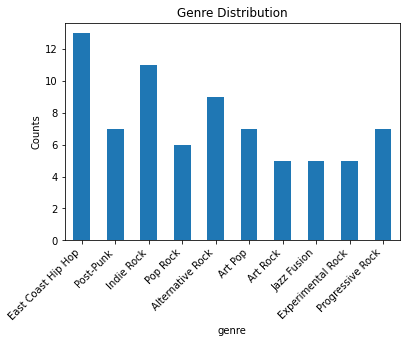

In [194]:
rym_top.value_counts('genre').reindex(index=testdf.genre.unique()).plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Genre Distribution')
plt.ylabel('Counts')

In [195]:
rym_top[rym_top.genre == 'Singer/Songwriter']

,position,album_id,artist,name,date,genres,rating,num_ratings,num_reviews,genre


**I don't like this 'Singer/Songwriter' genre**

In [196]:
rym_top = rym_top[rym_top.genre != 'Singer/Songwriter']
rym_top

,position,album_id,artist,name,date,genres,rating,num_ratings,num_reviews,genre
27,28,Album11082,Nas,Illmatic,1994,"[East Coast Hip Hop, Boom Bap, Hardcore Hip ...",4.19,25578,584,East Coast Hip Hop
32,33,Album11014,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),1993,"[East Coast Hip Hop, Boom Bap, Hardcore Hip ...",4.20,23647,412,East Coast Hip Hop
46,47,Album545,Joy Division,Closer,1980,[Post-Punk],4.10,25601,553,Post-Punk
95,96,Album22312,Genius/Gza,Liquid Swords,1995,"[East Coast Hip Hop, Hardcore Hip Hop, Boom ...",4.12,14884,316,East Coast Hip Hop
100,101,Album1088,Pixies,Surfer Rosa,1988,"[Indie Rock, Alternative Rock]",3.96,21863,366,Indie Rock
...,...,...,...,...,...,...,...,...,...,...
478,479,Album25613,Jay-Z,Reasonable Doubt,1996,"[East Coast Hip Hop, Boom Bap]",3.88,7930,160,East Coast Hip Hop
483,484,Album3651,The Mothers Of Invention,Freak Out!,1966,"[Experimental Rock, Satire]",3.83,10555,277,Experimental Rock
490,491,Album157,Stereolab,Dots And Loops,1997,"[Art Pop, Indietronica]",3.90,6857,81,Art Pop
493,494,Album705,Eno,Taking Tiger Mountain (By Strategy),1974,"[Art Rock, Art Pop]",3.88,7984,147,Art Rock


In [197]:
rym_top.columns

Index(['position', 'album_id', 'artist', 'name', 'date', 'genres', 'rating',
       'num_ratings', 'num_reviews', 'genre'],
      dtype='object')

In [198]:
rym_top = rym_top.drop(columns=["position","album_id","date","name","genres",'rating','num_ratings', 'num_reviews'])
rym_top

,artist,genre
27,Nas,East Coast Hip Hop
32,Wu-Tang Clan,East Coast Hip Hop
46,Joy Division,Post-Punk
95,Genius/Gza,East Coast Hip Hop
100,Pixies,Indie Rock
...,...,...
478,Jay-Z,East Coast Hip Hop
483,The Mothers Of Invention,Experimental Rock
490,Stereolab,Art Pop
493,Eno,Art Rock


In [201]:
rym_top_list = rym_top.artist.to_list()

**Re-build the lyrics list with cleaned "Rate Your Music" dataset**

In [209]:
rym_lyrics = []
for artist in rym_top_list:
    try:
        lyric_list = [artist]
        artist_search = LyricGenius.search_artist(artist, max_songs=5)
        for song in artist_search.songs:
            lyric_list.append(song.lyrics)
        rym_lyrics.append(lyric_list)
    except:
        print("Something went wrong here...")
        continue

Searching for songs by Nas...

Something went wrong here...
Searching for songs by Wu-Tang Clan...

Something went wrong here...
Searching for songs by Joy Division...

Song 1: "Love Will Tear Us Apart"
Song 2: "Disorder"
Song 3: "New Dawn Fades"
Song 4: "Shadowplay"
Song 5: "She’s Lost Control"

Reached user-specified song limit (5).
Done. Found 5 songs.
Searching for songs by Genius/Gza...

Changing artist name to 'GEDA The Genius & Grand Wizzard MC'
Song 1: "“0 To 100 GreenEnk Mix”"
Done. Found 1 songs.
Searching for songs by Pixies...

Something went wrong here...
Searching for songs by The Velvet Underground...

Song 1: "Heroin"
Song 2: "Sunday Morning"
Song 3: "Pale Blue Eyes"
Song 4: "Venus in Furs"
Song 5: "I’m Waiting for the Man"

Reached user-specified song limit (5).
Done. Found 5 songs.
Searching for songs by Smashing Pumpkins...

Changing artist name to 'The Smashing Pumpkins'
Song 1: "Bullet with Butterfly Wings"
Song 2: "1979"
Song 3: "Tonight, Tonight"
Song 4: "Disarm"

In [296]:
rym_lyrics_df = pd.DataFrame(rym_lyrics, columns=['0','1','2','3','4','5'])

In [297]:
rym_lyrics_df

,0,1,2,3,4,5
0,Joy Division,Love Will Tear Us Apart Lyrics[Verse 1]\nWhen ...,Disorder Lyrics[Verse 1]\nI've been waiting fo...,New Dawn Fades Lyrics[Verse 1]\nA change of sp...,Shadowplay Lyrics[Verse 1]\nTo the centre of t...,She’s Lost Control Lyrics[Verse 1]\nConfusion ...
1,Genius/Gza,“0 To 100 GreenEnk Mix” Lyrics[Verse 1: GEDA T...,None,None,None,None
2,The Velvet Underground,Heroin Lyrics[Verse 1]\nI don't know just wher...,Sunday Morning Lyrics[Verse 1]\nSunday morning...,Pale Blue Eyes Lyrics[Verse 1]\nSometimes I fe...,"Venus in Furs Lyrics[Verse 1]\nShiny, shiny, s...",I’m Waiting for the Man Lyrics[Verse 1]\nI'm w...
3,Smashing Pumpkins,Bullet with Butterfly Wings Lyrics[Verse 1]\nT...,1979 Lyrics[Verse 1]\nShakedown 1979\nCool kid...,"Tonight, Tonight Lyrics[Instrumental Intro]\n\...",Disarm Lyrics[Verse 1]\nDisarm you with a smil...,Today Lyrics[Chorus 1]\nToday is the greatest\...
4,Wilco,"Jesus, Etc. Lyrics[Verse 1]\nJesus, don't cry\...",I Am Trying to Break Your Heart Lyrics[Verse 1...,How to Fight Loneliness Lyrics[Verse 1]\nHow t...,Ashes of American Flags Lyrics[Verse 1]\nThe c...,"Radio Cure Lyrics[Verse 1]\nCheer up, honey, I..."
...,...,...,...,...,...,...
58,Jay-Z,Holy Grail Lyrics[Intro: Justin Timberlake]\nY...,Empire State of Mind Lyrics[Intro: JAY-Z]\nYea...,Part II (On the Run) Lyrics[Intro: Beyoncé]\nW...,The Story of O.J. Lyrics[Intro: Nina Simone]\n...,4:44 Lyrics[Intro: Hannah Williams]\nDo I find...
59,The Mothers Of Invention,Trouble Every Day Lyrics(Verse 1)\nWell I'm ab...,"Hungry Freaks, Daddy LyricsMr. America, walk o...",Brown Shoes Don’t Make It LyricsBrown shoes do...,Who Needs the Peace Corps? LyricsWhat's there ...,What’s the Ugliest Part of Your Body? LyricsWh...
60,Stereolab,Cybele’s Reverie Lyrics[Verse 1]\nMatières sen...,"Ping Pong Lyrics[Verse 1]\nIt's alright, 'caus...",Brakhage Lyrics[Verse 1]\nWe need so damn many...,Pack Yr Romantic Mind LyricsThe greater is the...,French Disko Lyrics[Intro]\n\n[Verse 1]\nThoug...
61,Eno,Ferrari Lyrics[Songtext zu „Ferrari“ ft. MERO]...,Penthouse Lyrics[Intro]\nUh-uh-uh\nUh-uh-uh-uh...,Blackberry Sky Lyrics[Songtext zu „Blackberry ...,"Fuchs Lyrics[Part 1: Eno]\nDu willst ein Foto,...",Mercedes Lyrics[Songtext zu „Mercedes“]\n\n[In...


In [298]:
rym_lyrics_df = rym_lyrics_df.set_index(['0']).stack().reset_index()
#rym_lyrics_df.to_csv('rym_lyrics_df.csv')

In [300]:
rym_lyrics_df.columns

Index(['0', 'level_1', 0], dtype='object')

In [301]:
rym_lyrics_df

,0,level_1,0
0,Joy Division,1,Love Will Tear Us Apart Lyrics[Verse 1]\nWhen ...
1,Joy Division,2,Disorder Lyrics[Verse 1]\nI've been waiting fo...
2,Joy Division,3,New Dawn Fades Lyrics[Verse 1]\nA change of sp...
3,Joy Division,4,Shadowplay Lyrics[Verse 1]\nTo the centre of t...
4,Joy Division,5,She’s Lost Control Lyrics[Verse 1]\nConfusion ...
...,...,...,...
306,Porcupine Tree,1,Trains Lyrics[Verse 1]\nTrain set and match sp...
307,Porcupine Tree,2,Lazarus LyricsAs the cheerless towns pass my w...
308,Porcupine Tree,3,Blackest Eyes Lyrics[Verse 1]\nA mother sings ...
309,Porcupine Tree,4,Arriving Somewhere But Not Here Lyrics[Verse 1...


In [302]:
rym_lyrics_df = rym_lyrics_df.rename(columns={'0':'artist', 0:'lyrics'})#.drop(columns=["level_1"])
rym_lyrics_df

,artist,level_1,lyrics
0,Joy Division,1,Love Will Tear Us Apart Lyrics[Verse 1]\nWhen ...
1,Joy Division,2,Disorder Lyrics[Verse 1]\nI've been waiting fo...
2,Joy Division,3,New Dawn Fades Lyrics[Verse 1]\nA change of sp...
3,Joy Division,4,Shadowplay Lyrics[Verse 1]\nTo the centre of t...
4,Joy Division,5,She’s Lost Control Lyrics[Verse 1]\nConfusion ...
...,...,...,...
306,Porcupine Tree,1,Trains Lyrics[Verse 1]\nTrain set and match sp...
307,Porcupine Tree,2,Lazarus LyricsAs the cheerless towns pass my w...
308,Porcupine Tree,3,Blackest Eyes Lyrics[Verse 1]\nA mother sings ...
309,Porcupine Tree,4,Arriving Somewhere But Not Here Lyrics[Verse 1...


In [303]:
rym_lyrics_df.drop(columns=['level_1'], inplace=True)
rym_lyrics_df

,artist,lyrics
0,Joy Division,Love Will Tear Us Apart Lyrics[Verse 1]\nWhen ...
1,Joy Division,Disorder Lyrics[Verse 1]\nI've been waiting fo...
2,Joy Division,New Dawn Fades Lyrics[Verse 1]\nA change of sp...
3,Joy Division,Shadowplay Lyrics[Verse 1]\nTo the centre of t...
4,Joy Division,She’s Lost Control Lyrics[Verse 1]\nConfusion ...
...,...,...
306,Porcupine Tree,Trains Lyrics[Verse 1]\nTrain set and match sp...
307,Porcupine Tree,Lazarus LyricsAs the cheerless towns pass my w...
308,Porcupine Tree,Blackest Eyes Lyrics[Verse 1]\nA mother sings ...
309,Porcupine Tree,Arriving Somewhere But Not Here Lyrics[Verse 1...


In [20]:
import regex as re
import string
#!pip install openpyxl

**Cleaning the social network derived lyrics dataset**

In [21]:
lyrics_genres = pd.read_excel('lyrics_genres.xlsx')
lyrics_genres.head()

,lyrics,genre
0,Walk Lyrics[Verse 1]\nCan't you see I'm easily...,groove metal
1,"Cemetery Gates Lyrics[Intro]\nReverend, Revere...",groove metal
2,This Love Lyrics[Verse 1]\nIf ever words were ...,groove metal
3,"Cowboys from Hell Lyrics[Intro]\nOh, come on\n...",groove metal
4,Domination Lyrics[Intro]\n(First take like a m...,groove metal


In [22]:
clean_lyrics = [str(row).lower().replace('\n',' ').translate(str.maketrans('','', string.punctuation)) for row in lyrics_genres.lyrics] 
clean_lyrics[7]

'dead skin mask lyricsintro how ive waited for you to come ive been here all alone now that youve arrived please stay awhile and i promise i wont keep you long ill keep you forever forever forever forever  verse 1 graze the skin with my fingertips the brush of dead cold flesh appease the means provoking images delicate features so smooth a pleasant fragrance in the light of the moon  chorus dance with the dead in my dreams listen to their hallowed screams the dead have taken my soul temptations lost all control  verse 2 simple smiles elude psychotic eyes lose all mind control rationale declines empty eyes enslave the creations of placid faces and lifeless pageants bridge in the depths of a mind insane fantasy and reality are the same  lead  king and hanneman  verse 3 graze the skin with my fingertips the brush of dead warm flesh pacifies the means incised members ornaments on my being adulating the skin before me  verse 2 simple smiles elude psychotic eyes lose all mind control rationa

In [23]:
lyrics_genres.drop(columns="lyrics",inplace=True)
lyrics_genres['clean_lyrics'] = clean_lyrics
lyrics_genres

,genre,clean_lyrics
0,groove metal,walk lyricsverse 1 cant you see im easily both...
1,groove metal,cemetery gates lyricsintro reverend reverend i...
2,groove metal,this love lyricsverse 1 if ever words were spo...
3,groove metal,cowboys from hell lyricsintro oh come on vers...
4,groove metal,domination lyricsintro first take like a mothe...
...,...,...
130,hip hop,yonkers lyricsintro uh wolf haley golf wang go...
131,hip hop,earfquake lyricsintro tyler the creator playb...
132,hip hop,see you again lyricsintro tyler the creator ok...
133,hip hop,ifhy lyricsintro tyler the creator i never wou...


Text(0, 0.5, 'Counts')

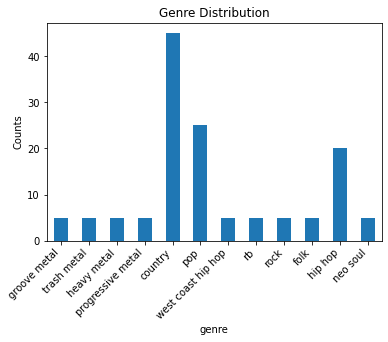

In [347]:
lyrics_genres.value_counts('genre').reindex(index=lyrics_genres.genre.unique()).plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Genre Distribution')
plt.ylabel('Counts')

In [24]:
#lyrics_genres.drop(columns="lyrics")

In [25]:
lyrics_genres.insert(0, 'clean_lyrics', lyrics_genres.pop('clean_lyrics'))
lyrics_genres

,clean_lyrics,genre
0,walk lyricsverse 1 cant you see im easily both...,groove metal
1,cemetery gates lyricsintro reverend reverend i...,groove metal
2,this love lyricsverse 1 if ever words were spo...,groove metal
3,cowboys from hell lyricsintro oh come on vers...,groove metal
4,domination lyricsintro first take like a mothe...,groove metal
...,...,...
130,yonkers lyricsintro uh wolf haley golf wang go...,hip hop
131,earfquake lyricsintro tyler the creator playb...,hip hop
132,see you again lyricsintro tyler the creator ok...,hip hop
133,ifhy lyricsintro tyler the creator i never wou...,hip hop


In [ ]:
rym_clean_lyrics = [str(row).lower().replace('\n',' ').translate(str.maketrans('','', string.punctuation)) for row in rym_lyrics_df.lyrics] 

In [306]:
rym_clean_lyrics[0]

'love will tear us apart lyricsverse 1 when routine bites hard and ambitions are low and resentment rides high but emotions wont grow and were changing our ways taking different roads  chorus then love love will tear us apart again love love will tear us apart again  verse 2 why is the bedroom so cold youve turned away on your side is my timing that flawed our respect runs so dry yet theres still this appeal that weve kept through our lives  chorus but love love will tear us apart again love love will tear us apart again instrumental break  verse 3 you cry out in your sleep all my failings exposed theres a taste in my mouth as desperation takes hold just that something so good just cant function no more  chorus then love love will tear us apart again love love will tear us apart again then love love will tear it apart again love love will tear it apart again84embed'

In [307]:
rym_lyrics_df.drop(columns="lyrics",inplace=True)
rym_lyrics_df['clean_lyrics'] = rym_clean_lyrics
rym_lyrics_df.insert(0, 'clean_lyrics', rym_lyrics_df.pop('clean_lyrics'))
rym_lyrics_df

,clean_lyrics,artist
0,love will tear us apart lyricsverse 1 when rou...,Joy Division
1,disorder lyricsverse 1 ive been waiting for a ...,Joy Division
2,new dawn fades lyricsverse 1 a change of speed...,Joy Division
3,shadowplay lyricsverse 1 to the centre of the ...,Joy Division
4,she’s lost control lyricsverse 1 confusion in ...,Joy Division
...,...,...
306,trains lyricsverse 1 train set and match spied...,Porcupine Tree
307,lazarus lyricsas the cheerless towns pass my w...,Porcupine Tree
308,blackest eyes lyricsverse 1 a mother sings a l...,Porcupine Tree
309,arriving somewhere but not here lyricsverse 1 ...,Porcupine Tree


In [309]:
rym_final = rym_lyrics_df.merge(rym_top, on='artist', how='inner')
rym_final

,clean_lyrics,artist,genre
0,love will tear us apart lyricsverse 1 when rou...,Joy Division,Post-Punk
1,disorder lyricsverse 1 ive been waiting for a ...,Joy Division,Post-Punk
2,new dawn fades lyricsverse 1 a change of speed...,Joy Division,Post-Punk
3,shadowplay lyricsverse 1 to the centre of the ...,Joy Division,Post-Punk
4,she’s lost control lyricsverse 1 confusion in ...,Joy Division,Post-Punk
...,...,...,...
306,trains lyricsverse 1 train set and match spied...,Porcupine Tree,Progressive Rock
307,lazarus lyricsas the cheerless towns pass my w...,Porcupine Tree,Progressive Rock
308,blackest eyes lyricsverse 1 a mother sings a l...,Porcupine Tree,Progressive Rock
309,arriving somewhere but not here lyricsverse 1 ...,Porcupine Tree,Progressive Rock


In [310]:
rym_final.drop(columns=['artist'],inplace=True)
rym_final

,clean_lyrics,genre
0,love will tear us apart lyricsverse 1 when rou...,Post-Punk
1,disorder lyricsverse 1 ive been waiting for a ...,Post-Punk
2,new dawn fades lyricsverse 1 a change of speed...,Post-Punk
3,shadowplay lyricsverse 1 to the centre of the ...,Post-Punk
4,she’s lost control lyricsverse 1 confusion in ...,Post-Punk
...,...,...
306,trains lyricsverse 1 train set and match spied...,Progressive Rock
307,lazarus lyricsas the cheerless towns pass my w...,Progressive Rock
308,blackest eyes lyricsverse 1 a mother sings a l...,Progressive Rock
309,arriving somewhere but not here lyricsverse 1 ...,Progressive Rock


In [28]:
#pip install nltk

**I'll start with some non-BERT classifiers**

In [29]:
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

#Knowing we have multiple languages, combine two 
#stopwords languages. 
master_stopwords = stopwords.words('english') + stopwords.words('spanish')

In [30]:
def get_tokens(lyrics):
    tokens = word_tokenize(lyrics)
    tokens = [token for token in tokens if not token in master_stopwords]
    return tokens

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

In [32]:
# lyrics = lyrics_genres.clean_lyrics
# lyrics
#lyric_tokens = get_tokens(lyrics)
X = lyrics_genres.clean_lyrics
y = lyrics_genres.genre

In [311]:
rym_X = rym_final.clean_lyrics
rym_y = rym_final.genre

In [35]:
y

0      groove metal
1      groove metal
2      groove metal
3      groove metal
4      groove metal
           ...     
130         hip hop
131         hip hop
132         hip hop
133         hip hop
134         hip hop
Name: genre, Length: 135, dtype: object

In [312]:
rym_y

0             Post-Punk
1             Post-Punk
2             Post-Punk
3             Post-Punk
4             Post-Punk
             ...       
306    Progressive Rock
307    Progressive Rock
308    Progressive Rock
309    Progressive Rock
310    Progressive Rock
Name: genre, Length: 311, dtype: object

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [313]:
rym_X_train, rym_X_test, rym_y_train, rym_y_test = train_test_split(rym_X, rym_y, test_size=0.20, random_state=42)

In [37]:
vectorize = TfidfVectorizer()

In [38]:
vector_Xtrain = vectorize.fit_transform(X_train)
vector_Xtest = vectorize.transform(X_test)

In [323]:
rym_vector = vectorize.fit_transform(rym_X_train)
rym_vector_test = vectorize.transform(rym_X_test)

In [210]:
tfidf_vectorizer_file = 'tfidf_vectorizer.pkl'
pickle.dump(vectorize, open(tfidf_vectorizer_file,'wb'))

In [316]:
rym_vectorizer_file = 'rym_tfidf_vectorizer.pkl'
pickle.dump(vectorize, open(rym_vectorizer_file,'wb'))

In [39]:
nb_clsf = MultinomialNB()

In [40]:
nb_clsf.fit(vector_Xtrain, y_train)

MultinomialNB()

In [321]:
rym_nb = nb_clsf.fit(rym_vector, rym_y_train)

In [336]:
rym_nb_preds = rym_nb.predict(rym_vector_test)

In [213]:
nb_file = 'nb_file.pkl'
pickle.dump(nb_clsf, open(nb_file, 'wb'))

In [340]:
rym_nb_file = 'rym_nb_file.pkl'
pickle.dump(rym_nb, open(rym_nb_file, 'wb'))

In [42]:
nb_clsf.score(vector_Xtrain, y_train)

0.4074074074074074

In [337]:
accuracy_score(rym_nb_preds, rym_y_test)

0.19047619047619047

In [43]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [44]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=master_stopwords)),
                ('clf', LinearSVC())])

#OneVsRestClassifier(LinearSVC(), n_jobs=1)

In [45]:
SVC_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('clf', LinearSVC())])

In [46]:
svc_prediction = SVC_pipeline.predict(X_test)

In [47]:
accuracy_score(svc_prediction, y_test)

0.37037037037037035

In [48]:
SVC_pipeline.score(svc_prediction, y_test)

0.2222222222222222

**I wonder if predictions improve with stopwords**

In [49]:
svc_clf = LinearSVC()
svc_clf.fit(vector_Xtrain, y_train)

LinearSVC()

In [322]:
rym_svc = LinearSVC()
rym_svc.fit(rym_vector, rym_y_train)

LinearSVC()

In [50]:
svc_preds = svc_clf.predict(vector_Xtest)

In [324]:
rym_svc_preds = rym_svc.predict(rym_vector_test)

In [51]:
svc_preds

array(['country', 'country', 'hip hop', 'country', 'country', 'country',
       'country', 'country', 'country', 'hip hop', 'country', 'country',
       'country', 'pop', 'country', 'country', 'west coast hip hop',
       'country', 'country', 'country', 'country', 'country', 'country',
       'hip hop', 'country', 'hip hop', 'country'], dtype=object)

In [325]:
rym_svc_preds

array(['Indie Rock', 'Post-Punk', 'Post-Punk', 'Indie Rock', 'Art Pop',
       'Art Pop', 'Alternative Rock', 'Indie Rock', 'Experimental Rock',
       'East Coast Hip Hop', 'Post-Punk', 'Jazz Fusion', 'Indie Rock',
       'Jazz Fusion', 'Alternative Rock', 'Indie Rock',
       'East Coast Hip Hop', 'Art Pop', 'Post-Punk', 'Indie Rock',
       'East Coast Hip Hop', 'Indie Rock', 'Progressive Rock',
       'East Coast Hip Hop', 'Indie Rock', 'Indie Rock',
       'East Coast Hip Hop', 'Indie Rock', 'Progressive Rock',
       'Progressive Rock', 'Indie Rock', 'Progressive Rock', 'Post-Punk',
       'Indie Rock', 'Indie Rock', 'Alternative Rock', 'Indie Rock',
       'Indie Rock', 'Progressive Rock', 'Art Pop', 'Progressive Rock',
       'Art Rock', 'Indie Rock', 'Art Pop', 'Progressive Rock',
       'Progressive Rock', 'Progressive Rock', 'Progressive Rock',
       'East Coast Hip Hop', 'Jazz Fusion', 'East Coast Hip Hop',
       'Progressive Rock', 'Jazz Fusion', 'Indie Rock', 'Indie Roc

In [52]:
accuracy_score(svc_preds, y_test)
#svc_clf.score(svc_preds, y_test)

0.37037037037037035

In [326]:
accuracy_score(rym_svc_preds, rym_y_test)

0.42857142857142855

In [214]:
svc_file = 'svc_file.pkl'
pickle.dump(svc_clf, open(svc_file, 'wb'))

In [334]:
rym_svc_file = 'rym_svc_file.pkl'
pickle.dump(rym_svc, open(rym_svc_file, 'wb'))

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
rf_clf = RandomForestClassifier(random_state=42)

# RF_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=master_stopwords)),
#                         ('clf', RandomForestClassifier(random_state=42))])

#n_estimators=num_estimator,max_depth=depth,

**I'll try several combinations, and pull the best params**

In [55]:
param_grid = { 
    'n_estimators': [150, 200, 250, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3,4,5,]
}

In [56]:
cv_rf_clf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5)
cv_rf_clf.fit(vector_Xtrain, y_train)

C:\Users\chris\Anaconda3\envs\630project\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [150, 200, 250, 300, 500]})

In [327]:
rym_cv_rf = GridSearchCV(estimator = rf_clf, param_grid = param_grid, cv=5)
rym_cv_rf.fit(rym_vector, rym_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [150, 200, 250, 300, 500]})

In [57]:
cv_rf_clf.best_params_

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}

In [328]:
rym_cv_rf.best_params_

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 300}

In [58]:
best_rf = RandomForestClassifier(random_state=42, max_depth=5, max_features='auto', n_estimators=200)

In [329]:
rym_best_rf = RandomForestClassifier(random_state=42, max_depth=5, max_features='auto', n_estimators=300)

In [59]:
best_rf.fit(vector_Xtrain, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [330]:
rym_best_rf.fit(rym_vector, rym_y_train)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)

In [60]:
rf_preds = best_rf.predict(vector_Xtest)

In [331]:
rym_rf_preds = rym_best_rf.predict(rym_vector_test)

In [61]:
accuracy_score(y_test,rf_preds)

0.2962962962962963

In [332]:
accuracy_score(rym_y_test,rym_rf_preds)

0.3968253968253968

In [215]:
best_rf_file = 'best_rf_file.pkl'
pickle.dump(best_rf, open(best_rf_file, 'wb'))

In [333]:
rym_best_rf_file = 'rym_best_rf_file.pkl'
pickle.dump(rym_best_rf, open(rym_best_rf_file, 'wb'))

In [341]:
def make_prediction(lyrics):
    
    vectorizer = pickle.load(open('tfidf_vectorizer.pkl','rb'))
    vect = vectorizer.transform(lyrics)
    
    best_rf = pickle.load(open('best_rf_file.pkl','rb'))
    svc_clf = pickle.load(open('svc_file.pkl','rb'))
    nb_clsf = pickle.load(open('nb_file.pkl','rb'))
    
    rf_pred = best_rf.predict(vect)
    svc_pred = svc_clf.predict(vect)
    nb_pred = nb_clsf.predict(vect)
    
    print("Random Forest prediction: " + str(rf_pred))
    print("Linear SVC prediction: " + str(svc_pred))
    print("Naive Bayes prediction: " + str(nb_pred))

In [362]:
lyrics_to_test = ["""I am not gonna lay around and whine and moan
For somebody that done me wrong
Don't think for a minute that I'm gonna sit around
And sing some old sad song

[Pre-Chorus 1]
I believe it's half full, not a half empty glass
Every day I wake up knowing it could be my last

[Chorus]
I ain't here for a long time, I'm here for a good time
So bring on the sunshine, to hell with the red wine
Pour me some moonshine
When I'm gone, put it in stone: "He left nothing behind"
I ain't here for a long time, I'm here for a good time

[Verse 2]
Folks are always dreaming about what they'd like to do
But I like to do just what I like
I take the chance, dance the dance
It might be wrong but then again it might be right

[Pre-Chorus 2]
There's no way of knowing what tomorrow brings
Life's too short to waste it, I say bring on anything

[Chorus]
I ain't here for a long time, I'm here for a good time
So bring on the sunshine, to hell with the red wine
Pour me some moonshine
When I'm gone, put it in stone: "He left nothing behind"
I ain't here for a long time, I'm here for a good time

[Outro]
I ain't here for a long time, I'm here for a good time"""]

**With original tfidf_vectorizer.pkl**

In [363]:
make_prediction(lyrics_to_test)

Random Forest prediction: ['country']
Linear SVC prediction: ['country']
Naive Bayes prediction: ['country']


**With rym_tfidf_vectorizer**

In [352]:
def rym_make_prediction(lyrics):
    
    vectorizer = pickle.load(open('rym_tfidf_vectorizer.pkl','rb'))
    vect = vectorizer.transform(lyrics)
    
    best_rf = pickle.load(open('rym_best_rf_file.pkl','rb'))
    svc_clf = pickle.load(open('rym_svc_file.pkl','rb'))
    nb_clsf = pickle.load(open('rym_nb_file.pkl','rb'))
    
    rf_pred = best_rf.predict(vect)
    svc_pred = svc_clf.predict(vect)
    nb_pred = nb_clsf.predict(vect)
    
    print("Random Forest prediction: " + str(rf_pred))
    print("Linear SVC prediction: " + str(svc_pred))
    print("Naive Bayes prediction: " + str(nb_pred))

In [364]:
rym_make_prediction(lyrics_to_test)

Random Forest prediction: ['Indie Rock']
Linear SVC prediction: ['Art Pop']
Naive Bayes prediction: ['Indie Rock']


In [71]:
#conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch
import torch as torch

In [319]:
#make_prediction(lyrics_to_test)

**Found a BERT-based model on Hugging Face**
***https://huggingface.co/juliensimon/autonlp-song-lyrics-18753417***

In [355]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [359]:
repo_name = 'juliensimon/autonlp-song-lyrics-18753417'

tokenizer = AutoTokenizer.from_pretrained(repo_name)
model = AutoModelForSequenceClassification.from_pretrained(repo_name)

In [360]:
def predict(lyrics):
	inputs = tokenizer(lyrics, padding=True, truncation=True, return_tensors="pt")
	outputs = model(**inputs)
	predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
	predictions = predictions.detach().numpy()[0]
	predictions = predictions*100
	print(predictions)
	sorted_indexes = np.argsort(predictions)
	return "These lyrics are {:.2f}% {}, {:.2f}% {} and {:.2f}% {}.".format(
		predictions[sorted_indexes[-1]], labels[sorted_indexes[-1]],
		predictions[sorted_indexes[-2]], labels[sorted_indexes[-2]],
		predictions[sorted_indexes[-3]], labels[sorted_indexes[-3]])

In [365]:
predict(lyrics_to_test)

[ 0.50936776  7.738683    0.4256337  11.464802   12.81546    67.04606   ]


'These lyrics are 67.05% trash metal, 12.82% groove metal and 11.46% groove metal.'